<a href="https://colab.research.google.com/github/MohadeseNikoogoftar/DeepNeuralNetwork-Projects/blob/main/Number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist


In [3]:
(train_features, train_labels),(test_features, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_features.shape

(60000, 28, 28)

In [5]:
test_features.shape

(10000, 28, 28)

5


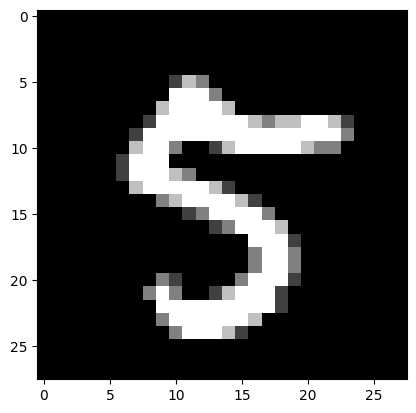

In [6]:
idx = 512
img = train_features[idx]

print(train_labels[idx])
plt.gray()
plt.imshow(img)

# Preproccesing

In [7]:
np.min(img), np.max(img)

(0, 255)

In [8]:
train_features = train_features/255.0
test_features = test_features/255.0

# model definition

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
# در اینجا  flatten میاد ماتریس رو به یک سطر یا همان لیست تبدیل میکنه که دیگه چند بعدی نباشه
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
# به این علت که ما 10 تا کلاس داریم به تعداد اعداد پس میایم برای لایه خروجی 10 تا نود تعریف میکنیم
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [10]:
model.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
 model.build(input_shape=(None, 28, 28))
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model.fit(train_features, train_labels, epochs=1000, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7967 - loss: 0.7561 - val_accuracy: 0.9426 - val_loss: 0.1844
Epoch 2/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.1665 - val_accuracy: 0.9589 - val_loss: 0.1346
Epoch 3/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.1135 - val_accuracy: 0.9650 - val_loss: 0.1105
Epoch 4/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0853 - val_accuracy: 0.9715 - val_loss: 0.0898
Epoch 5/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9811 - loss: 0.0648 - val_accuracy: 0.9740 - val_loss: 0.0850
Epoch 6/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0543 - val_accuracy: 0.9750 - val_loss: 0.0798
Epoch 7/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9881 - loss: 0.0416 - val_accuracy: 0.9769 - val_loss: 0.0764
Epoch 8/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0350 -

In [13]:
model.evaluate(test_features, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9777 - loss: 0.3750


[0.3218534290790558, 0.9815000295639038]

In [14]:
idx = 100
img = test_features[idx]
print(test_labels[idx])

6


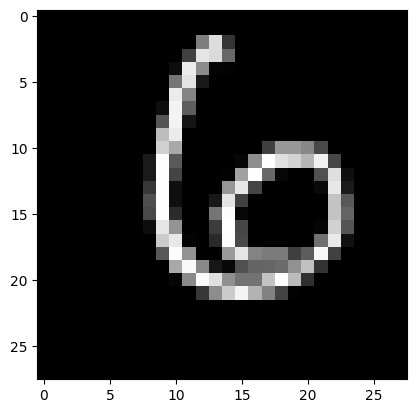

In [15]:
plt.gray()
plt.imshow(img)

In [17]:
model.predict(np.reshape(img, (1, 28, 28)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


array([[1.4296061e-30, 1.3344565e-40, 2.9819211e-40, 0.0000000e+00,
        0.0000000e+00, 9.2051296e-42, 1.0000000e+00, 0.0000000e+00,
        4.2847683e-38, 0.0000000e+00]], dtype=float32)

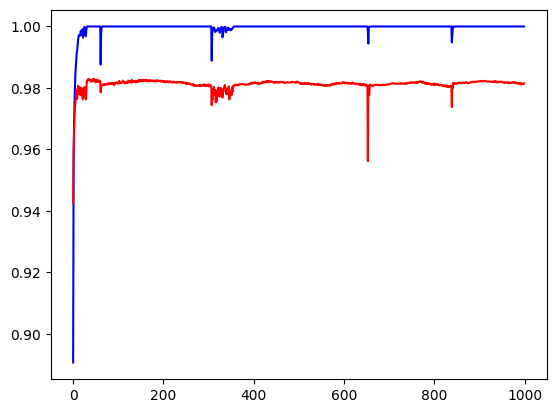

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')